In [10]:
import zipfile
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [11]:
with zipfile.ZipFile('./datasets/nyc-rolling-sales.zip', 'r') as zip_ref:
  zip_ref.extractall('./datasets')

In [12]:
df = pd.read_csv('./datasets/nyc-rolling-sales.csv')

# Atur Pandas agar menampilkan semua kolom pada dataset
pd.set_option('display.max_columns', 999)

df.head(15)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [14]:
# Hapus kolom
del df['Unnamed: 0']
del df['EASE-MENT']
del df['APARTMENT NUMBER']

In [15]:
# Ubah tipe data kolom menjadi numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# Ubah tipe data kolom menjadi datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

# Ubah kolom menjadi kategorikal
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [17]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [18]:
# Hapus data dengan nilai kosong
df = df.dropna()

In [19]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [20]:
sum(df.duplicated(df.columns)) 

348

In [21]:
# Hapus data duplikat
df = df.drop_duplicates(df.columns, keep='last')

sum(df.duplicated(df.columns))

0

In [22]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,47896.000000,47896.000000,47896.000000,47896.000000,47896.000000,47896.000000,47896.000000,4.789600e+04,4.789600e+04,47896.000000,4.789600e+04
mean,3.254948,4994.514970,234.777205,10940.163500,2.534888,0.237473,2.791319,3.270904e+03,3.525875e+03,1828.445152,1.158310e+06
std,0.901887,3429.465212,495.924368,1074.738599,17.169930,10.845527,20.427834,3.054984e+04,2.920511e+04,463.083421,1.344264e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,2223.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.400750e+03,8.157500e+02,1920.000000,1.000000e+05
50%,3.000000,4666.000000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.133000e+03,1.620000e+03,1931.000000,4.850000e+05
75%,4.000000,7008.000000,94.000000,11238.000000,2.000000,0.000000,2.000000,3.050000e+03,2.508000e+03,1961.000000,8.350000e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [23]:
# Terdapat nilai 0 pada ZIP CODE
# 75 tidak mempunyai COMMERCIAL UNITS
# 50% mempunyai TOTAL UNITS 1
# terdapat value 0 untuk LAND SQUARE FEET dan GROSS SQUARE FEET
# Terdapat nilai 0 pada YEAR BUILT
# Terdapat nilai 0 pada SALE PRICE

In [24]:
df = df[(df!=0).all(1)]
df = df[df['TOTAL UNITS'] == df['RESIDENTIAL UNITS'] + df['COMMERCIAL UNITS']]

df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03,1.471000e+03,1471.000000,1.471000e+03
mean,2.886472,3898.866077,38.629504,10929.745071,12.895989,1.552685,14.448674,7.119053e+03,1.483578e+04,1926.812373,4.872085e+06
std,1.089855,3144.530370,62.660401,512.941551,70.914066,1.608157,71.847968,1.119180e+05,1.096216e+05,22.001333,2.170806e+07
min,1.000000,16.000000,1.000000,10001.000000,1.000000,1.000000,2.000000,6.200000e+02,6.840000e+02,1800.000000,1.000000e+00
25%,2.000000,1415.000000,9.000000,10457.000000,2.000000,1.000000,3.000000,1.782000e+03,2.649000e+03,1912.000000,6.231715e+05
50%,3.000000,3144.000000,30.000000,11212.000000,2.000000,1.000000,3.000000,2.069000e+03,3.642000e+03,1927.000000,1.175000e+06
75%,4.000000,5603.500000,47.000000,11234.000000,5.000000,2.000000,7.000000,2.922000e+03,5.998500e+03,1931.000000,2.912500e+06
max,5.000000,16180.000000,1402.000000,11694.000000,1844.000000,25.000000,1866.000000,4.228300e+06,3.750565e+06,2016.000000,6.200000e+08


# Measures of Central Tendency

## Mean

In [25]:
df.mean(numeric_only=True)

BOROUGH              2.886472e+00
BLOCK                3.898866e+03
LOT                  3.862950e+01
ZIP CODE             1.092975e+04
RESIDENTIAL UNITS    1.289599e+01
COMMERCIAL UNITS     1.552685e+00
TOTAL UNITS          1.444867e+01
LAND SQUARE FEET     7.119053e+03
GROSS SQUARE FEET    1.483578e+04
YEAR BUILT           1.926812e+03
SALE PRICE           4.872085e+06
dtype: float64

## Median

In [26]:
df.median(numeric_only=True)

BOROUGH                    3.0
BLOCK                   3144.0
LOT                       30.0
ZIP CODE               11212.0
RESIDENTIAL UNITS          2.0
COMMERCIAL UNITS           1.0
TOTAL UNITS                3.0
LAND SQUARE FEET        2069.0
GROSS SQUARE FEET       3642.0
YEAR BUILT              1927.0
SALE PRICE           1175000.0
dtype: float64

## Modus

In [27]:
df.mode().iloc[0]

BOROUGH                                                                   3.0
NEIGHBORHOOD                                               BEDFORD STUYVESANT
BUILDING CLASS CATEGORY           02 TWO FAMILY DWELLINGS                    
TAX CLASS AT PRESENT                                                        1
BLOCK                                                                   790.0
LOT                                                                       1.0
BUILDING CLASS AT PRESENT                                                  S2
ADDRESS                                                     1049 RUTLAND ROAD
ZIP CODE                                                              11226.0
RESIDENTIAL UNITS                                                         2.0
COMMERCIAL UNITS                                                          1.0
TOTAL UNITS                                                               3.0
LAND SQUARE FEET                                                

# Measure of Spread

## Range

In [28]:
df.select_dtypes(include=np.number).max() - df.select_dtypes(include=np.number).min()

BOROUGH                      4.0
BLOCK                    16164.0
LOT                       1401.0
ZIP CODE                  1693.0
RESIDENTIAL UNITS         1843.0
COMMERCIAL UNITS            24.0
TOTAL UNITS               1864.0
LAND SQUARE FEET       4227680.0
GROSS SQUARE FEET      3749881.0
YEAR BUILT                 216.0
SALE PRICE           619999999.0
dtype: float64

## Variance

In [29]:
df.var(numeric_only=True)

BOROUGH              1.187783e+00
BLOCK                9.888071e+06
LOT                  3.926326e+03
ZIP CODE             2.631090e+05
RESIDENTIAL UNITS    5.028805e+03
COMMERCIAL UNITS     2.586168e+00
TOTAL UNITS          5.162131e+03
LAND SQUARE FEET     1.252563e+10
GROSS SQUARE FEET    1.201690e+10
YEAR BUILT           4.840586e+02
SALE PRICE           4.712399e+14
dtype: float64

## Standard Variation

In [30]:
df.std(numeric_only=True)

BOROUGH              1.089855e+00
BLOCK                3.144530e+03
LOT                  6.266040e+01
ZIP CODE             5.129416e+02
RESIDENTIAL UNITS    7.091407e+01
COMMERCIAL UNITS     1.608157e+00
TOTAL UNITS          7.184797e+01
LAND SQUARE FEET     1.119180e+05
GROSS SQUARE FEET    1.096216e+05
YEAR BUILT           2.200133e+01
SALE PRICE           2.170806e+07
dtype: float64

# Probability Distribution

In [181]:
def get_best_distribution(data, log=False):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        
        if log: 
            print("p value for "+dist_name+" = "+str(p))
        
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    if log:
        print("Best fitting distribution: "+str(best_dist))
        print("Best p value: "+ str(best_p))
        print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [182]:
def init_fig_axes(cols, ncols=3, figsize=(20, 10)):
  nrows = math.ceil(len(cols) / ncols) 

  fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))
  fig.tight_layout()

  # Hapus figure yang tidah dibutuhkan
  for i in range(-1, -((ncols * nrows) - len(cols))-1, -1):
    fig.delaxes(axes[nrows-1][i])  
  
  return fig, axes

/usr/local/anaconda3/envs/py3.7/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1727: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))
/usr/local/anaconda3/envs/py3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/anaconda3/envs/py3.7/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1727: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))
/usr/local/anaconda3/envs/py3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/anaconda3/envs/py3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/anaconda3/envs/py3.7/lib/python3.7/site-packages/scipy/stats/_c

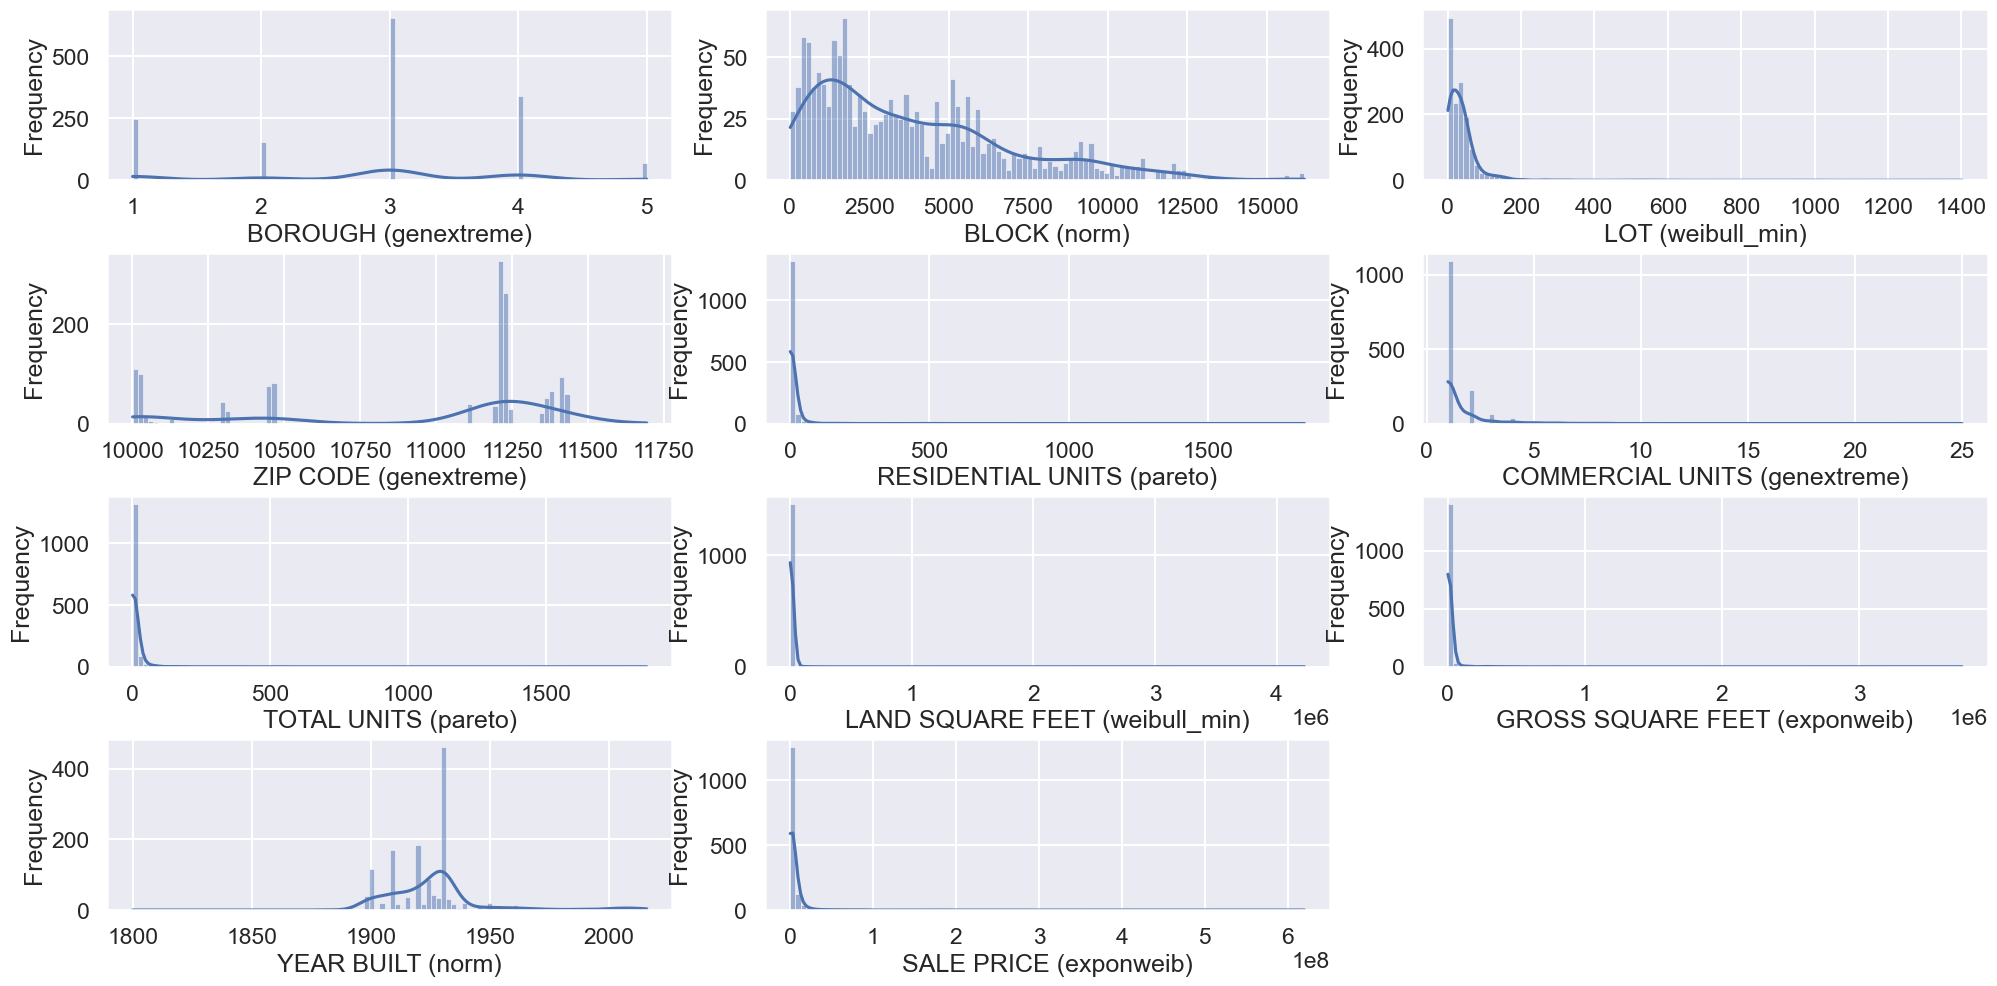

In [183]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numeric_dtypes)
numeric_cols = numeric_df.columns.tolist()

fig, axes = init_fig_axes(numeric_cols)

# Tampilkan plot probability distribution
for ax, col in zip(axes.ravel(), numeric_cols):
  best_dist, _, __ = get_best_distribution(df[col])
  
  ax.set(xlabel=col + ' (' + best_dist + ')', ylabel='Frequency')
  sns.histplot(df[col],
               bins=100,
               kde=True,
               ax=ax)

plt.show()

# Confidence Intervals

In [199]:
def plot_CI(data, ax, n = 25):
  sample_means = []

  for sample in range(0, 300):
    sample_values = np.random.choice(a=data, size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
  mean_of_sample_means = np.mean(sample_means)
  standard_error = data.std()/np.sqrt(n)
  lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
  upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
  kde = st.gaussian_kde(sample_means)
  pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
  
  ax.plot(pos, kde(pos))
  
  shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
  
  ax.fill_between(shade, kde(shade), alpha=0.33)

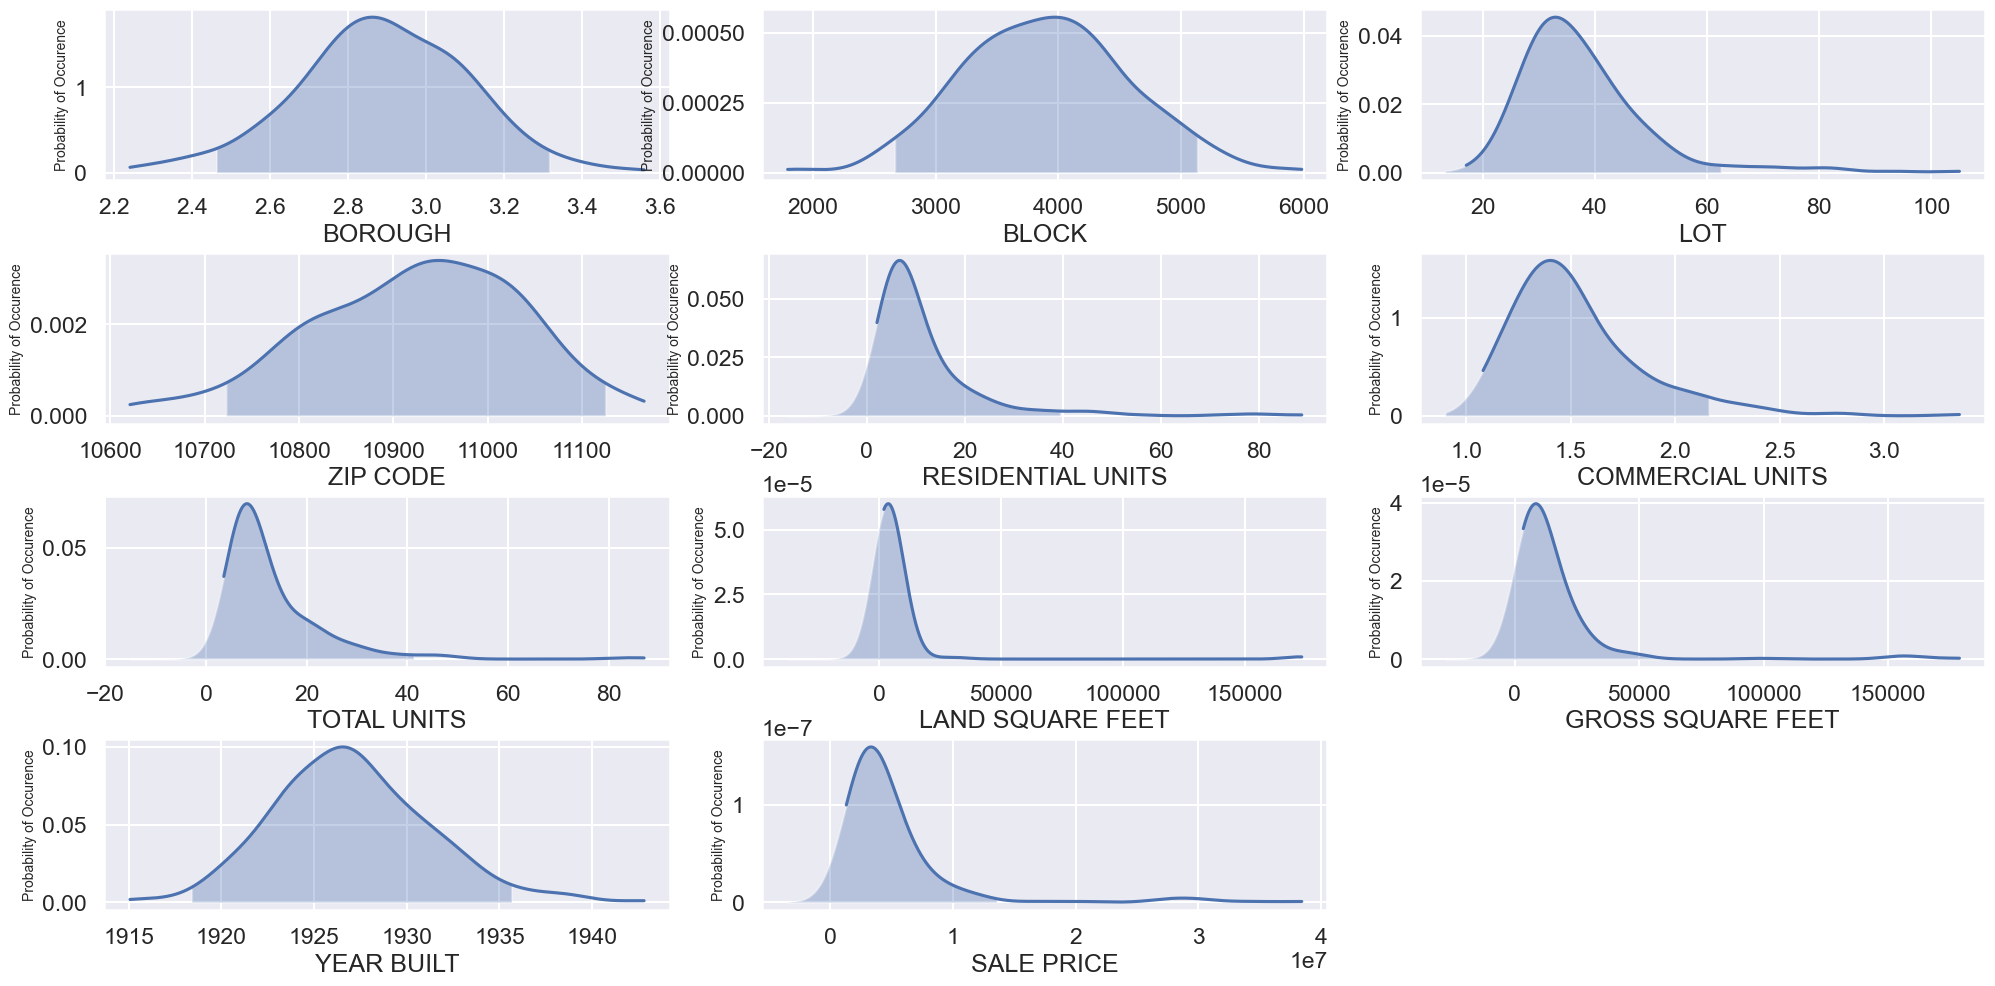

In [208]:
fig, axes = init_fig_axes(numeric_cols)

# Tampilkan plot CI
for ax, col in zip(axes.ravel(), numeric_cols):
  ax.yaxis.label.set_size(12)
  ax.set(xlabel=col, ylabel='Probability of Occurence')
  plot_CI(df[col], ax=ax)

plt.show()

# Hypothesis Testing